In [16]:
import pandas as pd
import numpy as np

In [4]:
sales_of_company_x = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('/Users/kseniagorchakova/Library/Mobile Documents/com~apple~CloudDocs/Education/!Profession_DS/Временные ряды/Лекция_1/Series/daily-total-female-births-in-cal.csv')

### Отображение графиков

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

In [6]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

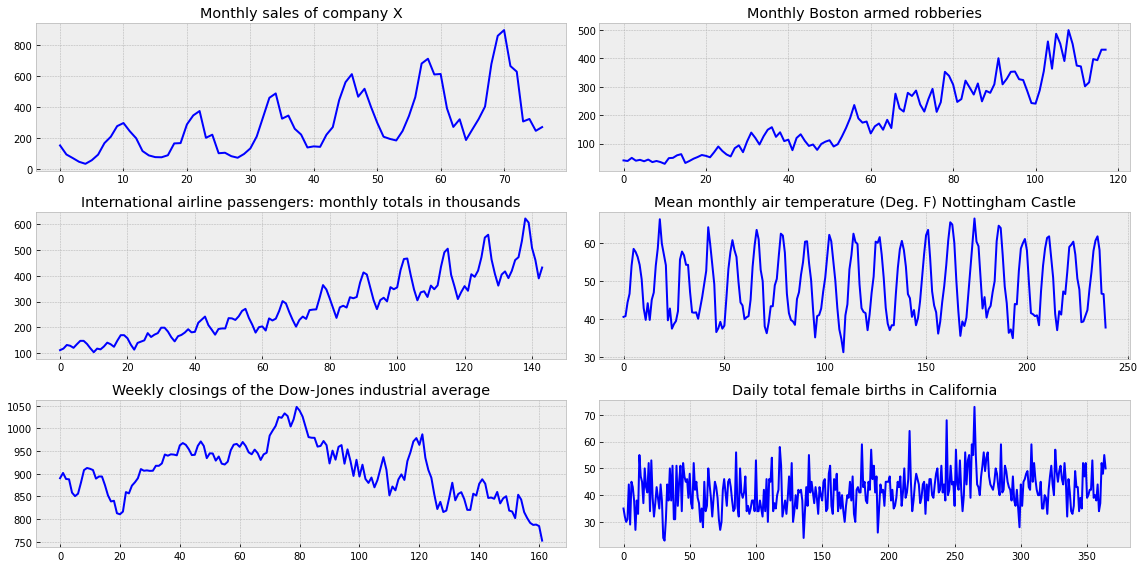

In [7]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

### График №1

In [10]:
# Сделаем тест Дики-Фуллера для проверки ряда на стационарность
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Не можем отвергнуть нулевую гипотезу о нестационарности временного ряда (p-value больше 0,05%. Поэтому сделаем преобразование в виде дифференцирования

In [19]:
series_1 = np.diff(all_series["Monthly sales of company X"], 1)

In [22]:
series_1 = np.diff(series_1)

In [23]:
test_stationarity(series_1)

Results of Dickey-Fuller Test:
Test Statistic                -9.193734e+00
p-value                        2.089629e-15
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда

Text(0.5, 1.0, 'Двойное дифференцирование Monthly sales of company X')

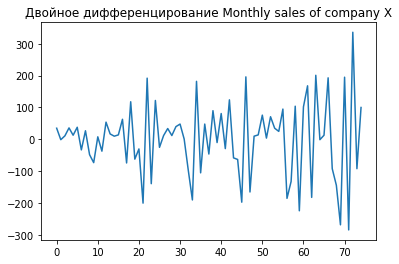

In [28]:
plt.plot(series_1)
plt.title('Двойное дифференцирование Monthly sales of company X')

### График 2

In [29]:
# Тест для проверки ряда на стационарность
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Не можем отвергнуть нулевую гипотезу о нестационарности временного ряда (p-value больше 0,05%. Поэтому сделаем преобразование в виде дифференцирования

In [36]:
series_2 = np.diff(all_series["Monthly Boston armed robberies"],1)

In [37]:
test_stationarity(series_2)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда

Text(0.5, 1.0, 'Дифференцирование Monthly Boston armed robberies')

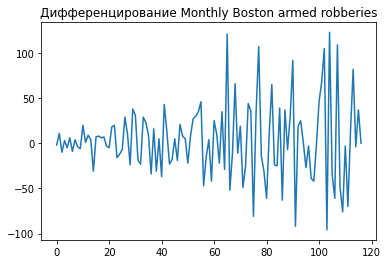

In [38]:
plt.plot(series_2)
plt.title('Дифференцирование Monthly Boston armed robberies')

### График №3

In [39]:
# Тест для проверки ряда на стационарность
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Не можем отвергнуть нулевую гипотезу о нестационарности временного ряда (p-value больше 0,05%. Поэтому сделаем преобразование в виде двойного дифференцирования

In [40]:
series_3 = np.diff(all_series["International airline passengers: monthly totals in thousands"],1)

In [42]:
series_3 = np.diff(series_3)

In [43]:
test_stationarity(series_3)

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда

Text(0.5, 1.0, 'Двойное дифференцирование International airline passengers: monthly totals in thousands')

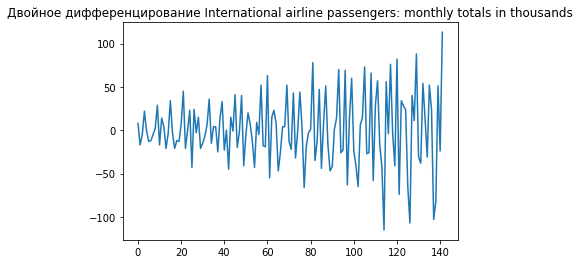

In [45]:
plt.plot(series_3)
plt.title('Двойное дифференцирование International airline passengers: monthly totals in thousands')

### График №4

In [51]:
# Тест для проверки ряда на стационарность
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


Не можем отвергнуть нулевую гипотезу о нестационарности временного ряда (p-value больше 0,05%. Поэтому сделаем преобразование Бокса-Кокса

In [55]:
series_4 = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"],0)

In [56]:
test_stationarity(series_4)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда

Text(0.5, 1.0, 'BoxCox Mean monthly air temperature (Deg. F) Nottingham Castle')

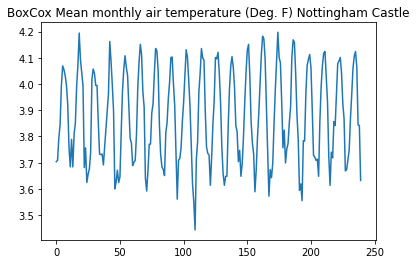

In [58]:
plt.plot(series_4)
plt.title('BoxCox Mean monthly air temperature (Deg. F) Nottingham Castle')

### График №5

In [59]:
# Тест для проверки ряда на стационарность
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


Не можем отвергнуть нулевую гипотезу о нестационарности временного ряда (p-value больше 0,05%. Поэтому сделаем преобразование дифференцирование

In [62]:
series_5 = np.diff(all_series["Weekly closings of the Dow-Jones industrial average"],1)

In [63]:
test_stationarity(series_5)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда

Text(0.5, 1.0, 'Дифференцирование Weekly closings of the Dow-Jones industrial average')

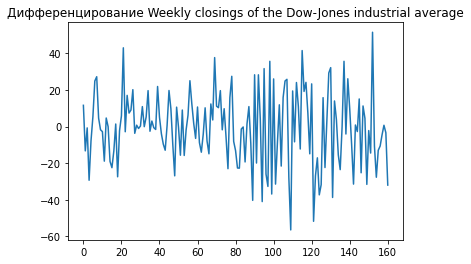

In [65]:
plt.plot(series_5)
plt.title('Дифференцирование Weekly closings of the Dow-Jones industrial average')

### График №6

In [66]:
# Тест для проверки ряда на стационарность
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


P-value около нуля, поэтому можно отвергнуть нулевую гипотезу о нестационарности ряда